In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Las compuertas logicas son relaciones entre dos variables que arrojan un resultado unico
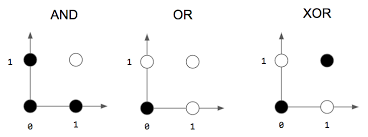

### El perceptron es capaz de resolver las logicas AND and OR, en este caso estudiaremos la logica AND
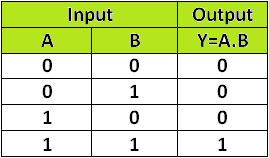

#### Primeramente Generamos los datos de entrenamiento, es decir la relacion logica AND, los dos primeros son los datos de entrada y el ultimo es la salida deseada (bias,x1,x2)

In [2]:
data = np.array([[1,0, 0,0], [1,0, 1,0], [1,1,0,0], [1,1,1,1]], np.float32)  # AND
# data = np.array([[1,0, 0,0], [1,0, 1,1], [1,1,0,1], [1,1,1,0]], np.float32)    # XOR

#### Graficamos los datos para visualizar nuestra muestra de entrenamiento

Text(0, 0.5, 'X2')

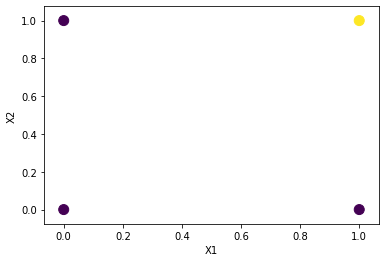

In [3]:
plt.scatter(data[: ,1], data[: ,2], c=data[: ,3], s=100, cmap='viridis')
plt.xlabel("X1")
plt.ylabel("X2")

Usamos el perceptron para que aprenda dicha logica
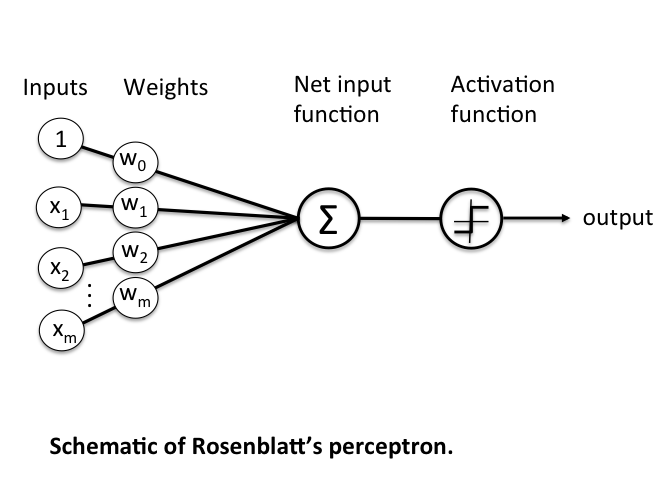

### Definimos una funcion perceptron que toma como argumento los datos de entrada (bias,x1,x2) y los pesos (w0,w1,w2)

In [4]:
def activate(inputs, weights):
    activation=0.0
    for i,w in zip(inputs,weights):
        activation += i*w 
    return 1.0 if activation>=0.0 else 0.0

In [5]:
weights = np.array([0.2,0.2,0.2])
activate(data[0],weights)

1.0

In [6]:
def training(dataset,l_rate,n_epoch):
    weights = [np.random.uniform(0, 1) for i in range(len(dataset[0]))]
    #weights = np.array([0.2,0.2,0.2])
    print("initial weights  ",weights)
    
    err = np.array([])
    itera = np.array([])

    for epoch in range(n_epoch):
        sum_error = 0.0
        for i in range(len(dataset)): 
            prediction =  activate(dataset[i][:-1],weights)
            error = dataset[i][-1] - prediction
            print("error row ",error)
            sum_error += error**2
            for j in range(len(weights)):                 # calculate new weight for each node
                weights[j] = weights[j]+(l_rate*error*dataset[i][j])
                
        print("Iteration # ",epoch," Error = ",sum_error," W[0] ",weights[0], "W[1] ",weights[1], "W[2] ",weights[2])
        print("==================================================")
        plt.scatter(data[:, 1], data[:, 2], c=data[:,3], s=100, cmap='viridis')
        plot_x = np.array([np.min(data[:, 1] - 0.2), np.max(data[:, 2]+0.2)])
        plot_y =  -1 / weights[2] * (weights[1] * plot_x + weights[0])
        plot_y = np.reshape(plot_y, [2, -1])
        plot_y = np.squeeze(plot_y)
        plt.plot(plot_x, plot_y, color='k', linewidth=2)
        plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
        plt.text(0.425, 1.05, 'AND logic', fontsize=14)
        plt.xticks([0.0, 0.5, 1.0]); plt.yticks([0.0, 0.5, 1.0])
        plt.show()
        
        err = np.append(err,sum_error)
        itera = np.append(itera,epoch)
        
        # si el error total en la muestra es igual a 0 sale del loop de iteraciones 
        if(sum_error == 0.0): 
            print("errores ",err, "iteraciones ",itera)
            plt.plot(itera,err,'o-')
            plt.xlabel("Epoch")
            plt.ylabel("SSE")
            break

        
        
    return weights

initial weights   [0.8528917294874788, 0.8855259333331515, 0.30125052979733324, 0.7082618726645218]
error row  -1.0
error row  -1.0
error row  -1.0
error row  0.0
Iteration #  0  Error =  3.0  W[0]  0.5528917294874789 W[1]  0.7855259333331516 W[2]  0.20125052979733324


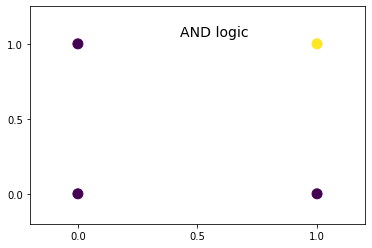

error row  -1.0
error row  -1.0
error row  -1.0
error row  0.0
Iteration #  1  Error =  3.0  W[0]  0.25289172948747896 W[1]  0.6855259333331516 W[2]  0.10125052979733323


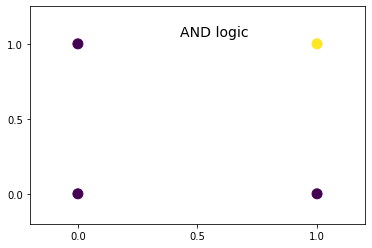

error row  -1.0
error row  -1.0
error row  -1.0
error row  0.0
Iteration #  2  Error =  3.0  W[0]  -0.04710827051252106 W[1]  0.5855259333331516 W[2]  0.0012505297973332274


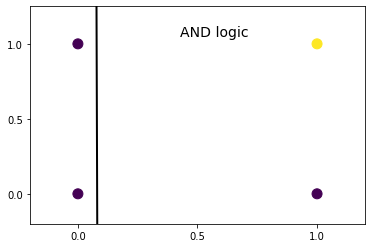

error row  0.0
error row  0.0
error row  -1.0
error row  0.0
Iteration #  3  Error =  1.0  W[0]  -0.14710827051252107 W[1]  0.48552593333315164 W[2]  0.0012505297973332274


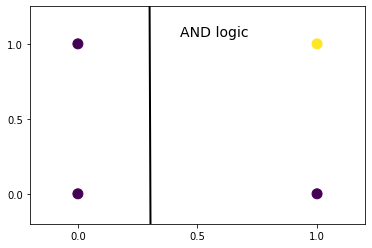

error row  0.0
error row  0.0
error row  -1.0
error row  0.0
Iteration #  4  Error =  1.0  W[0]  -0.24710827051252107 W[1]  0.38552593333315166 W[2]  0.0012505297973332274


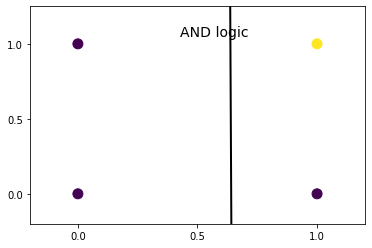

error row  0.0
error row  0.0
error row  -1.0
error row  1.0
Iteration #  5  Error =  2.0  W[0]  -0.24710827051252107 W[1]  0.38552593333315166 W[2]  0.10125052979733323


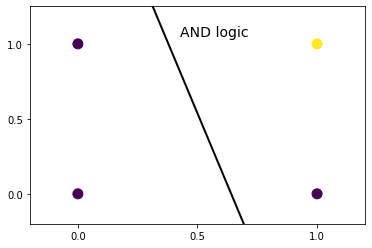

error row  0.0
error row  0.0
error row  -1.0
error row  0.0
Iteration #  6  Error =  1.0  W[0]  -0.3471082705125211 W[1]  0.2855259333331517 W[2]  0.10125052979733323


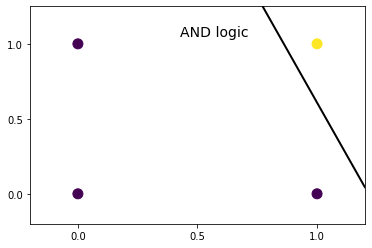

error row  0.0
error row  0.0
error row  0.0
error row  0.0
Iteration #  7  Error =  0.0  W[0]  -0.3471082705125211 W[1]  0.2855259333331517 W[2]  0.10125052979733323


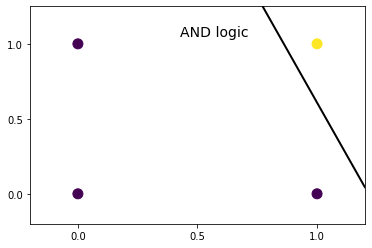

errores  [3. 3. 3. 1. 1. 2. 1. 0.] iteraciones  [0. 1. 2. 3. 4. 5. 6. 7.]


[-0.3471082705125211,
 0.2855259333331517,
 0.10125052979733323,
 0.8082618726645218]

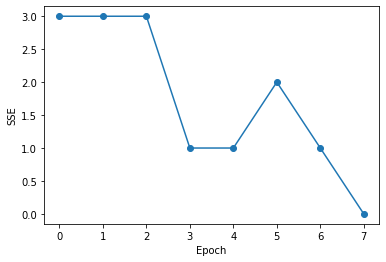

In [7]:
training(data,0.1,20)